## Data Loading and Preprocessing

In [91]:
# importing required dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import string

In [92]:
df = pd.read_json("./problems_data.jsonl",lines=True)
df.head()

,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ...",hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0 2 3 2 50 60 50 30 50 40', 'outpu...",hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3 3 C 2 C 1 C', 'output': 'GHOST...",hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0 10 0 10 10', 'output': '14.14'...",hard,9.6,https://open.kattis.com/problems/barktree


In [93]:
df.loc[0, "sample_io"]

[{'input': '7 10',
  'output': '1 2\n2 3\n1 3\n3 4\n5 6\n6 7\n5 7\n1 7\n7 2\n5 1'}]

2nd row has no input_description and no output_description -> maybe empty strings

In [94]:
# droping title, url, sample_io columns
df.drop(columns=["title", "url", "sample_io"], inplace=True)

In [95]:
df.shape

(4112, 5)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   description         4112 non-null   object 
 1   input_description   4112 non-null   object 
 2   output_description  4112 non-null   object 
 3   problem_class       4112 non-null   object 
 4   problem_score       4112 non-null   float64
dtypes: float64(1), object(4)
memory usage: 160.8+ KB


In [97]:
df.isnull().sum()

description           0
input_description     0
output_description    0
problem_class         0
problem_score         0
dtype: int64

No None, NaN values in the dataset

In [98]:
# checking for strings having "NA" or "N/A"
df.isin(["N/A", "NA", "n/a", 'na']).sum().sum()

0

In [99]:
# checking for empty strings in the dataset
df.isin([""]).sum().sum()

332

In [100]:
df.head()

,description,input_description,output_description,problem_class,problem_score
0,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7
1,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7
2,Mario and Luigi are playing a game where they ...,,,hard,9.6
3,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6
4,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6


In [101]:
# combining all columns about task description
# df["task_description"] = df["description"] + ", "+ df["input_description"] + ", " + df["output_description"]
df["task_description"] = df["input_description"] + ", " + df["output_description"]

In [102]:
df.head()

,description,input_description,output_description,problem_class,problem_score,task_description
0,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7,The input consists of one line with two intege...
1,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7,"The input consists of $10$ test cases, which a..."
2,Mario and Luigi are playing a game where they ...,,,hard,9.6,","
3,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6,The first line contains two integers $L$ and $...
4,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6,The first line of input consists of two intege...


In [103]:
# checking for rows having no task description
(df["task_description"] == ", ").sum()

118

In [104]:
df.shape

(4112, 6)

In [105]:
# dropping rows which have no task description
df["task_description"] = df["task_description"].replace(", ", np.nan)
df.dropna(subset=["task_description"], inplace=True)


In [106]:
# checking for rows having no task description
(df["task_description"] == ", ").sum()

0

Now all the rows in task_description column are not empty

## Text cleaning

In [107]:
punc = string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [108]:
df.loc[0, "task_description"]

'The input consists of one line with two integers\n    $N$ and $M$, the number of vertices and edges\n    your graph should have. Apart from the sample, there will be\n    only one test case, with $N =\n    100$ and $M =\n    500$., The output consists of $M$ lines where the $i$:th contains two integers\n    $u_ i$ and $v_ i$ ($1 \\leq u_ i, v_ i \\leq N$). This\n    indicates that the vertices $u_\n    i$ and $v_ i$ are\n    connected with an edge in your graph.'

The string contains new line characters and punctuations, uppercase characters etc.

In [109]:
nlp = spacy.load("en_core_web_sm")
stopwords = nlp.Defaults.stop_words
print(stopwords)

{'whereas', 'wherever', 'both', 'we', 'had', '’d', 'itself', 'see', 'did', 'either', 'various', 'really', 'never', 'two', 'should', 'am', 'are', 'a', 'whatever', 'if', 'indeed', 'have', 'throughout', 'as', 'through', 'yours', 'elsewhere', 'all', 'then', 'just', 'on', 'that', 'us', 'no', 'for', 'whither', 'our', 'none', 'would', 'anyhow', 'which', 'though', 'became', 'perhaps', 'very', 'afterwards', 'he', 'even', 'at', 'least', 'same', 'almost', 'name', 'but', 'other', 'most', 'side', 'upon', 'fifty', 'be', 'me', 'some', 'without', 'during', 'although', 'mine', 'sometime', 'any', 'something', 'again', 'once', 'move', 'twelve', 'do', 'whole', 'whether', 'cannot', 'everywhere', 'has', 'nevertheless', 'she', 'being', 'not', 'out', 'an', 'across', 'therefore', 'rather', 'beside', 'hundred', 'whose', 'else', 'her', 'latter', 'its', 'few', 'over', 'and', 'put', 'here', 'already', 'many', 'serious', 'such', 'seeming', 'by', 'used', 'i', "'ll", '’m', 'off', 'amount', 'along', 'except', 'beyond'

In [110]:
# for text cleaning and lemmatization
def transform_text(text):
  # remove newline characters
  text = text.replace("\n", " ")

  # remove punctuation
  for pun in string.punctuation:
    text = text.replace(pun, "")

  doc = nlp(text)

  # tokenize and convert words to lowercase
  text_tokens = [token.lemma_.lower() for token in doc]

  # remove stopwords
  meaningful_tokens = [i for i in text_tokens if i.isalnum() and i not in stopwords]

  return " ".join(meaningful_tokens)


In [111]:
text = "Tony- is playing PUBG $ right now#."
transform_text(text)

'tony play pubg right'

In [112]:
df["cleaned_task_desc"] = df["task_description"].apply(lambda x: transform_text(x))

<Axes: xlabel='problem_class', ylabel='count'>

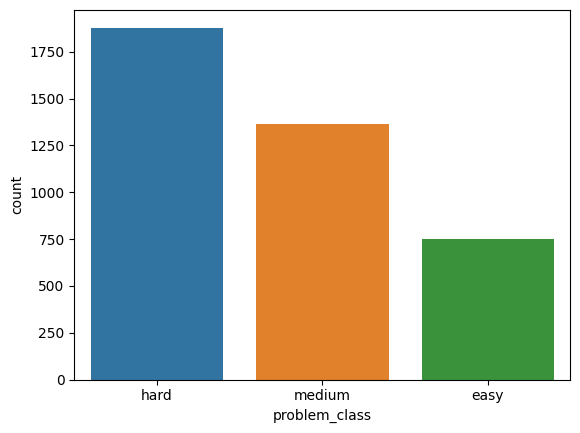

In [113]:
# EDAs
sns.countplot(data=df, x="problem_class", hue="problem_class")

In [114]:
df.shape

(3994, 7)

**Data is imbalanced**

In [115]:
df["num_characters"] = df["cleaned_task_desc"].apply(len)

In [116]:
df.head()

,description,input_description,output_description,problem_class,problem_score,task_description,cleaned_task_desc,num_characters
0,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,hard,9.7,The input consists of one line with two intege...,input consist line integer n m number vertex e...,191
1,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,hard,9.7,"The input consists of $10$ test cases, which a...",input consist 10 test case describe print k li...,129
3,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,hard,9.6,The first line contains two integers $L$ and $...,line contain integer l n l length wire n numbe...,255
4,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,hard,9.6,The first line of input consists of two intege...,line input consist integer n m 1 le n le 50 nu...,315
6,The objective of this problem is to train a Bi...,The program you submit should read no input.,,hard,9.6,"The program you submit should read no input.,",program submit read input,25


In [117]:
df["num_characters"].groupby(df["problem_class"]).describe()

,count,mean,std,min,25%,50%,75%,max
problem_class,,,,,,,,
easy,752.0,231.676862,118.045154,41.0,145.0,206.5,291.0,802.0
hard,1879.0,262.031932,139.023477,25.0,161.0,233.0,338.0,1028.0
medium,1363.0,264.178283,136.645408,38.0,163.0,238.0,343.0,1222.0


**hard problem have more characters on average**

In [118]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=12, background_color="white")

(-0.5, 499.5, 499.5, -0.5)

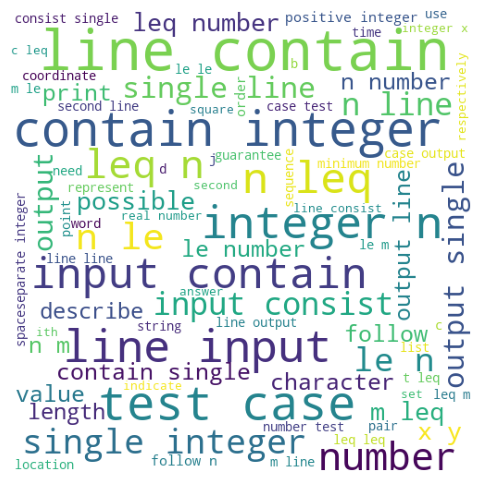

In [119]:
hard_wc = wc.generate(df[df["problem_class"] == "hard"]["cleaned_task_desc"].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(hard_wc.to_image())
plt.axis("off")

(-0.5, 499.5, 499.5, -0.5)

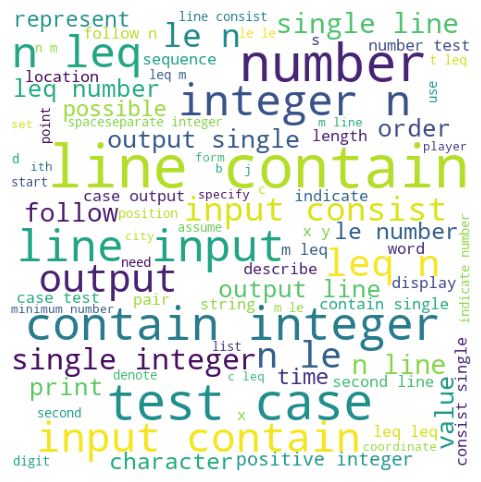

In [120]:
medium_wc = wc.generate(df[df["problem_class"] == "medium"]["cleaned_task_desc"].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(medium_wc.to_image())
plt.axis("off")

(-0.5, 499.5, 499.5, -0.5)

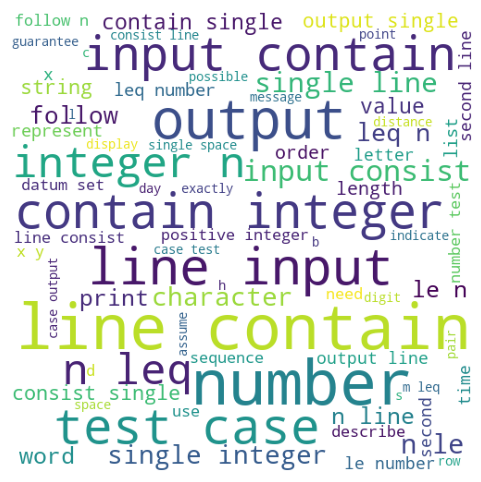

In [121]:
easy_wc = wc.generate(df[df["problem_class"] == "easy"]["cleaned_task_desc"].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(easy_wc.to_image())
plt.axis("off")

In [458]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.pipeline import Pipeline

In [459]:
X = df["cleaned_task_desc"]
y = df["problem_class"]

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [461]:
print(X_train.shape,X_test.shape)

(3195,) (799,)


Vectorizer

In [462]:
vec = TfidfVectorizer(ngram_range=(1, 2), analyzer="char", max_features=1000)
# vec = CountVectorizer(ngram_range=(1, 2), analyzer="char", max_features=1000)


Logistic Regression

In [463]:
lr = LogisticRegression(class_weight="balanced", max_iter=5000, penalty="l2", C=0.001)
lr_pipe = Pipeline([("vec", vec), ("clf", lr)])
lr_pipe.fit(X_train, y_train)

/Users/amareswarnagam/Desktop/autojudge-project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vec', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [464]:
lr_pipe.classes_

array(['easy', 'hard', 'medium'], dtype=object)

In [465]:
y_train_pred = lr_pipe.predict(X_train)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred)*100
print(accuracy_on_train_data)

43.84976525821596


In [466]:
y_test_pred = lr_pipe.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, y_test_pred)*100
print(accuracy_on_test_data)
f1_on_test_data = f1_score(y_test, y_test_pred, average="weighted")
print(f1_on_test_data)

38.423028785982474
0.38212894734147657


SVC

In [467]:
svc = LinearSVC(class_weight="balanced", C=0.01)

In [468]:
svc_pipe = Pipeline([("vec", vec), ("clf", svc)])
svc_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vec', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [469]:
svc_pipe.classes_

array(['easy', 'hard', 'medium'], dtype=object)

In [470]:
y_train_pred = svc_pipe.predict(X_train)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred)*100
print(accuracy_on_train_data)

49.389671361502344


In [471]:
y_test_pred = svc_pipe.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, y_test_pred)*100
print(accuracy_on_test_data)
f1_on_test_data = f1_score(y_test, y_test_pred, average="weighted")
print(f1_on_test_data)

48.685857321652065
0.353240876751895


Naive byes

In [472]:
vec = TfidfVectorizer(ngram_range=(1, 2), analyzer="char")
# vec = CountVectorizer(ngram_range=(2, 3), analyzer="word", max_features=1000)

In [473]:
cnb = ComplementNB(alpha=0.1, norm=True, fit_prior=True)
cnb_pipe = Pipeline([("vec", vec), ("clf", cnb)])
cnb_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vec', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [474]:
y_train_pred = cnb_pipe.predict(X_train)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred)*100
print(accuracy_on_train_data)
y_test_pred = cnb_pipe.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, y_test_pred)*100
print(accuracy_on_test_data)
f1_on_test_data = f1_score(y_test, y_test_pred, average="weighted")
print(f1_on_test_data)

51.54929577464789
48.310387984981226
0.35467115764349927


In [475]:
mnb = MultinomialNB(alpha=0.1, fit_prior=True)
mnb_pipe = Pipeline([("vec", vec), ("clf", mnb)])
mnb_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('vec', ...), ('clf', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None


In [476]:
y_train_pred = mnb_pipe.predict(X_train)
accuracy_on_train_data = accuracy_score(y_train, y_train_pred)*100
print(accuracy_on_train_data)
y_test_pred = mnb_pipe.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, y_test_pred)*100
print(accuracy_on_test_data)
f1_on_test_data = f1_score(y_test, y_test_pred, average="weighted")
print(f1_on_test_data)

49.8904538341158
47.934918648310386
0.3302639370327341
